# [F-20] 비지도 학습 (Unsupervised Learning)

정답 label이 없는 데이터가 주어졌을 때 데이터셋의 특징(feature) 및 패턴을 기반으로 모델 스스로가 새로운 데이터에 대한 결과를 예측하는 방법
- 블로그 참조: https://ebbnflow.tistory.com/165

> - 데이터 X가 무엇인지에 대한 정답 라벨 y가 없음
> - y가 될 수 있는 분류 기준(클래스 or 카테고리)이 없음


## 1. 클러스터링(1) K-means
: k값이 주어질 때, 주어진 데이터들을 k개의 클러스터로 묶는 알고리즘
<br/>

### 1-1. 데이터 생성
5개의 중심점을 기준으로 무작위 점 데이터 100개 생성하기

In [1]:
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 중심점이 5개인 100개의 점 데이터를 무작위로 생성합니다.
points, labels = make_blobs(n_samples=100, centers=5, n_features=2, random_state=135)

print(points.shape, points[:10])  # 무작위로 생성된 점의 좌표 10개 출력
print(labels.shape, labels[:20])  # 10개의 점들이 각각 대응하는 중심점(label) 값 출력

(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2 1 1 1 4 1 1 0 1 0 0]


> `make_blobs()`: (가우시안) 정규분포를 이용해 가상 데이터를 생성
> - 정규분포: 평균 μ와 표준편차 $\sigma^2$에 의해 분포가 확정됨
> - 일반적으로 클러스터링 가상 데이터 생성하는데 사용 <br/>

✔️ Input 파라미터
- n_samples: 표본 데이터의 수
- n_features: 독립 변수의 수
- centers: 생성할 클러스터의 수
- cluster_std: 클러스터의 표준편차
- center_box: 생성할 클러스터의 바운딩 박스
- shuffle: True라면 숫자를 랜덤으로 섞어줌
<br/>

✔️ Return 파라미터
- X: [n_samples, n_features] 크기의 배열: 독립변수
- y: [n_samples] 크기의 배열: 종속 변수

-생성한 데이터 좌표에 그려보기

,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097


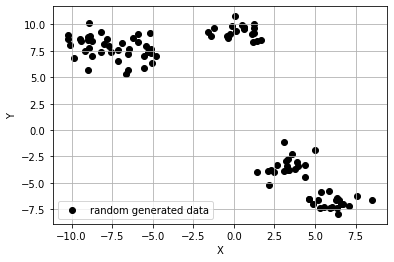

In [2]:
# 축 그리기
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)

fig, ax = plt.subplots(1, 1)

# 위에서 생성한 점 데이터들을 pandas DataFrame 형태로 변환하기
points_df = pd.DataFrame(points, columns=['X', 'Y'])
display(points_df.head()) # print로 하면 표가 안 나옴

# 점 데이터를 X-Y grid에 시각화하기
ax.scatter(points[:, 0], points[:, 1], c='black', label='random generated data')

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

> 중심점(`center`)이 5개인 무작위 point 100개를 생성해 5개의 군집을 만들었다.
> - **`k-means`** 알고리즘을 적용해 위 데이터들을 올바르게 군집화할 수 있는지 살펴보기

### 1-2. 생성한 데이터에 K-means 알고리즘 적용
데이터의 거리는 `L2-distance(유클리드 거리)`를 이용하자

#### 🌱 K-means 알고리즘의 순서
1. 원하는 클러스터의 수(K) 결정
2. 무작위로 클러스터의 수와 같은 K개의 중심점(centroid) 선정 - 각 클러스터 대표
3. 나머지 점들과 모든 centroid간의 유클리드 거리를 계산한 후, 가장 가까운 거리를 가지는 중심점의 클러스에 속하도록 함
4. 각 K개의 클러스터의 중심점 재조정. 특정 클러스터에 속하는 모든 점들의 평균값이 해당 클러스 다음 iteration의 중심점이 됨
5. 재조정된 중심점을 바탕으로 모든 점들과 새로 조정된 중심점 간의 유클리드 거리 다시 계산한 후, 가장 가까운 거리를 가지는 클러스터에 해당 점을 재배정.
6. 4, 5번 반복 수행. 특정 iteration 이상이 되면(중심점이 더 바뀌지 않는다면) 수렴.

In [3]:
from sklearn.cluster import KMeans

# 1), 2) 위에서 생성한 무작위 점 데이터(points)에 클러스터의 수(K)가 5인 K-means 알고리즘을 적용 
kmeans_cluster = KMeans(n_clusters=5)

# 3) ~ 6) 과정이 전부 함축되어 있는 코드입니다. points에 대하여 K가 5일 때의 K-means iteration을 수행
kmeans_cluster.fit(points)

print(type(kmeans_cluster.labels_))
print(np.shape(kmeans_cluster.labels_))
print(np.unique(kmeans_cluster.labels_))

<class 'numpy.ndarray'>
(100,)
[0 1 2 3 4]


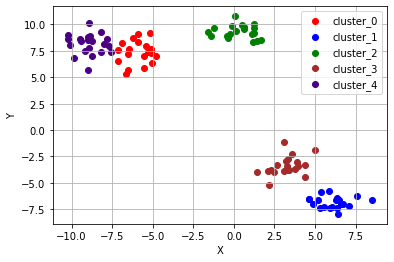

In [4]:
# n번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
color_dict = {0:'red', 1:'blue', 2:'green', 3:'brown', 4:'indigo'} 

# 점 데이터를 X-Y grid에 시각화합니다.
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
fig, ax = plt.subplots(1, 1)

# K-means clustering의 결과대로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(5):
    cluster_sub_points = points[kmeans_cluster.labels_ == cluster] # 전체 무작위 점 데이터에서 K-means 알고리즘에 의해 군집화된 sub data를 분리합니다. 
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster)) # 해당 sub data를 plot합니다.

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

### 1-3. K-means 알고리즘이 잘 동작하지 않는 예시들
#### (1) 원형 분포
> `make_circles`: 2차원에 작은 원을 포함하는 큰 원이 포함된 임의의 데이터셋 생성
> - `factor`: (0, 1) 범위로 두 개의 원 scaling
>> - 아래처럼 `factor=0.5`라면 큰 원과 작은 원의 스케일링 차이가 0.5
> - `noise`: 가우시안 노이즈의 표준 편차
>> - **가우시안 노이즈**: 정규 분포를 갖는 노이즈. 갑자기 튀거나 같은 noise가 아닌 어느 정도 무작위로 발생하며 일반적으로 볼 수 있는 분포 ([참조 블로그](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=laonple&logNo=221308675739#:~:text=Gaussian%20Noise%EB%8A%94%20%EC%A0%95%EA%B7%9C%20%EB%B6%84%ED%8F%AC,%EC%9E%88%EB%8A%94%20%EB%B6%84%ED%8F%AC%EB%A5%BC%20%EA%B0%96%EA%B3%A0%20%EC%9E%88%EC%8A%B5%EB%8B%88%EB%8B%A4.))
> - X(n_samples, 2), y(n_samples) 리턴

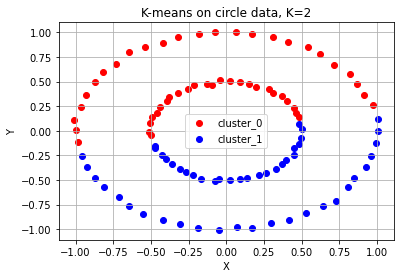

In [5]:
# K-means algorithm이 잘 동작하지 않는 예시 (1) 원형 분포
from sklearn.datasets import make_circles

# 원형 분포 데이터 생성
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01) # 원형 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
fig, ax = plt.subplots(1, 1)

# 원형 분포에 대해 K-means 수행
circle_kmeans = KMeans(n_clusters=2) # 클러스터 2개
circle_kmeans.fit(circle_points)
color_dict = {0: 'red', 1: 'blue'}

for cluster in range(2):
    cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
    ax.set_title('K-means on circle data, K=2')
    
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

> 가운데의 작은 원과 바깥쪽의 큰 원 2개로 분류되길 원했지만 x

#### (2) 초승달 모양

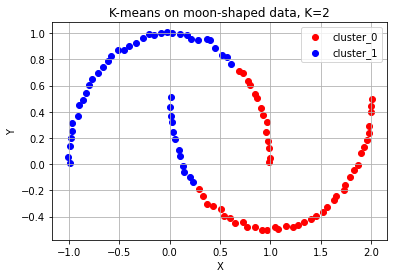

In [6]:
# K-means algorithm이 잘 동작하지 않는 예시 (2) 달 모양 분포
from sklearn.datasets import make_moons

# 달 모양 분포의 데이터 생성
moon_points, moon_labels = make_moons(n_samples=100, noise=0.01) # 달 모양 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
fig, ax = plt.subplots(1, 1)

# 달 모양 분포 데이터 plot
moon_kmeans = KMeans(n_clusters=2)
moon_kmeans.fit(moon_points)
color_dict = {0: 'red', 1: 'blue'}

for cluster in range(2):
    cluster_sub_points = moon_points[moon_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))

    ax.set_title('K-means on moon-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

> 2개의 달 형태를 분리해 군집화하지 x

#### (3) 대각선 모양 분포

In [7]:
a = np.array([[1, 1],
              [1, 1],
              [0, 3]])
b = [[1, 1], [2, 1]]
# a@b
np.matmul(a, b)

array([[3, 2],
       [3, 2],
       [6, 3]])

In [8]:
a = np.array([[1, 1],
              [2, 1],
              [0, 3]])
b = [[0.6, -0.6], [-0.4, 0.8]]
# a@b
np.matmul(a, b)

array([[ 0.2,  0.2],
       [ 0.8, -0.4],
       [-1.2,  2.4]])

In [9]:
np.dot(a, b)

array([[ 0.2,  0.2],
       [ 0.8, -0.4],
       [-1.2,  2.4]])

In [10]:
diag_points, _ = make_blobs(n_samples=100, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
print(diag_points[:5])
# print(diag_points.shape)
print(transformation)
diag_points = np.dot(diag_points, transformation)
# print(diag_points)

[[-9.67143166 -5.64254567]
 [ 2.98596211 -0.26447334]
 [ 1.74510725 -0.57447465]
 [-8.58639566 -6.07263111]
 [-8.3624028  -6.32873113]]
[[0.6, -0.6], [-0.4, 0.8]]


❓❓ 대각 행렬

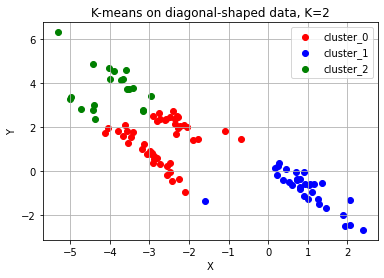

In [11]:
# K-means algorithm이 잘 동작하지 않는 예시 (3) 대각선 모양 분포
from sklearn.datasets import make_circles, make_moons, make_blobs

# 대각선 모양 분포의 데이터 생성
diag_points, _ = make_blobs(n_samples=100, random_state=170) # 대각선 분포를 가지는 점 데이터 100개를 생성합니다.(현재는 무작위 분포)
transformation = [[0.6, -0.6], [-0.4, 0.8]] # 대각선 변환을 위한 대각 행렬
diag_points = np.dot(diag_points, transformation) # 본 과정을 통해 무작위 분포의 점 데이터를 대각선 분포로 변환합니다.
# diag_points = np.matmul(diag_points, transformation)
# diag_points = diag_points @ transformation
# a@b, np.matmul(a, b)와 동일. dot 미사용 권장

# 캔버스 생성
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
fig, ax = plt.subplots(1, 1)

# 대각선 모양 분포 데이터 plot
diag_kmeans = KMeans(n_clusters=3)
diag_kmeans.fit(diag_points)
color_dict = {0: 'red', 1: 'blue', 2: 'green'}

for cluster in range(3):
    cluster_sub_points = diag_points[diag_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))

ax.set_title('K-means on diagonal-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

#### ✔️ K-means이 적합한 군집화 알고리즘이 아닌 경우
- K(군집의 수)를 미리 지정해야 하기 때문에 이를 알거나 예측하기 어려운 경우에는 사용이 어려움
- `Euclidean distance`를 기반으로 군집이 생기므로 데이터의 분포에 따라 밀접하게 연관되어있지만 거리가 멀기 때문에 데이터 군집화를 잘 수행하기 어려울 수 있음

> - 이상치에 민감
> - 평균 대신 중간점(medoids)을 사용하는 K-medoids clustering 방법도 있음

## 2. 클러스터링(2) DBSCAN
**Density** Based Spatial Clustering of Applications with Noise
- 밀도 기반 군집 알고리즘
- K의 개수를 미리 지정할 필요 없고, 유클리드 거리 기반으로 군집을 생성하지 않아 불특정 형태의 군집도 찾을 수 있다!
- 클러스터가 최초 임의의 점 하나로부터 점점 퍼져나가는데, 그 기준이 바로 *일정 반경 안의 데이터의 수* ('데이터의 밀도')

### 2-1. DBSCAN 알고리즘 동작 원리
1. 임의의 점 p를 설정하고, p를 포함해 주어진 클러스터의 반경(elipson) 안에 포함되어 있는 점들의 수를 세기
2. 해당 원에 minPts개 이상의 점이 포함되어 있다면, 해당 점 p를 core point로 간주하고 원에 포함된 점들을 하나의 클러스터로 묶자.
3. 해당 원에 minPts개 미만의 점이 포함되어 있다면 일단 pass
4. 모든 점에 대해 1~3의 과정을 반복하는데 만일 새로운 점 p'가 core point가 되고 이 점이 기존 클러스터(p를 core point로 하는)에 속한다면, 두 개의 클러스터는 연결되어있다고 하며 하나의 클러스터로 묶어주자.
5. 모든 점에 대해 클러스터링 과정을 끝냈는데, 어떤 점을 중심으로도 클러스터에 속하지 못한 점은 noise point로 간주. 특정 군집에는 속하지만 core point가 아닌 점들을 border point라고 함.

- epsilon: 클러스터의 반경
- minPts: 클러스터를 이루는 개체의 최솟값
- core point: 반경 epsilon 내에 minPts 개 이상의 점이 존재하는 중심점
- border point: 군집의 중심이 되진 못하지만 군집에는 속하는 점
- noise point: 군집에 포함되지 못하는 점

### 2-2. DBSCAN 알고리즘 적용해보기

# of cluster: 2
DBSCAN Y-hat: [0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1]


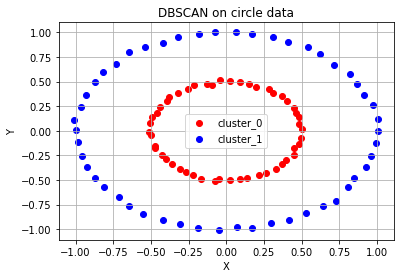

In [12]:
# DBSCAN으로 circle, moon, diagonal shaped data를 군집화한 결과
from sklearn.cluster import DBSCAN

fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3: 'brown', 4: 'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

# 원형 분포 데이터 plot
epsilon, minPts = 0.2, 3     # 2)와 3) 과정에서 사용할 epsilon, minPts 값을 설정
circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)    # 위에서 생성한 원형 분포 데이터에 DBSCAN setting
circle_dbscan.fit(circle_points)    # 3) ~ 5) 과정을 반복
n_cluster = max(circle_dbscan.labels_) + 1    # 3) ~5) 과정의 반복으로 클러스터의 수 도출

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {circle_dbscan.labels_}')

# DBSCAN 알고리즘의 수행결과로 도출된 클러스터의 수를 기반으로 색깔 별로 구분하여 점에 색칠한 후 도식
for cluster in range(n_cluster):
    cluster_sub_points = circle_points[circle_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on circle data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 2
DBSCAN Y-hat: [0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1
 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1
 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1]


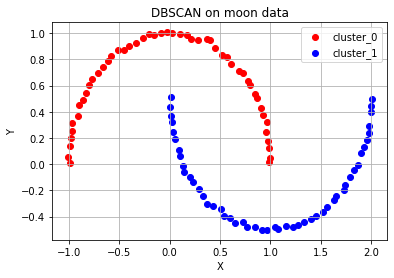

In [13]:
# 달 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown', 4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.4, 3
moon_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
moon_dbscan.fit(moon_points)
n_cluster = max(moon_dbscan.labels_) + 1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {moon_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = moon_points[moon_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on moon data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 3
DBSCAN Y-hat: [ 0  1  1  0  0  2  2  0  1  2  2  2  0  2  0  1  2  2  2  1  1  1  1  1
  2  2  0  1  0  2  1  0  2  1  2  0  0  0  0  0  1  0  1  0  0  2  1  1
  0  2  1  1  2  1  0  2 -1  2  0  0  2  0  0  1  0  1  1  2  2  2 -1  0
  2  0  0  0  1  2  2 -1  2  2  1  2  0  0  2  1  1  2  1  1  2  0 -1  1
  0  0  0  1]


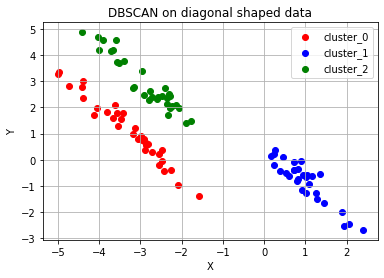

In [14]:
# 대각선 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown', 4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.7, 3
diag_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
diag_dbscan.fit(diag_points)
n_cluster = max(diag_dbscan.labels_) + 1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {diag_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = diag_points[diag_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on diagonal shaped data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

> 위 DBSCAN 결과 중 -1인 값: 어느 군집에도 속하지 못하는 `noise point`

### 2-3. DBSCAN 알고리즘과 K-means 알고리즘의 소요 시간 비교

# of samples: 100 / Elapsed time of K-means: 0.09270s / DBSCAN: 0.00106s
# of samples: 500 / Elapsed time of K-means: 0.01484s / DBSCAN: 0.00228s
# of samples: 1000 / Elapsed time of K-means: 0.01603s / DBSCAN: 0.00470s
# of samples: 2000 / Elapsed time of K-means: 0.01702s / DBSCAN: 0.01153s
# of samples: 5000 / Elapsed time of K-means: 1.04845s / DBSCAN: 0.08631s
# of samples: 7500 / Elapsed time of K-means: 1.06279s / DBSCAN: 0.08788s
# of samples: 10000 / Elapsed time of K-means: 0.87466s / DBSCAN: 0.15868s
# of samples: 20000 / Elapsed time of K-means: 1.10949s / DBSCAN: 0.44656s
# of samples: 30000 / Elapsed time of K-means: 0.96438s / DBSCAN: 0.79781s
# of samples: 40000 / Elapsed time of K-means: 1.05157s / DBSCAN: 1.37589s
# of samples: 50000 / Elapsed time of K-means: 1.16250s / DBSCAN: 2.08300s


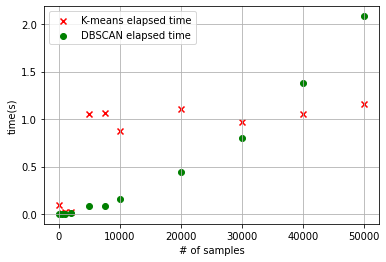

In [15]:
# DBSCAN 알고리즘과 K-means 알고리즘의 시간을 비교하는 코드 
import time

n_samples= [100, 500, 1000, 2000, 5000, 7500, 10000, 20000, 30000, 40000, 50000]

kmeans_time = []
dbscan_time = []
x = []
for n_sample in n_samples:
    dummy_circle, dummy_labels = make_circles(n_samples=n_sample, factor=0.5, noise=0.01) # 원형의 분포를 가지는 데이터 생성

    # K-means 시간을 측정
    kmeans_start = time.time()
    circle_kmeans = KMeans(n_clusters=2)
    circle_kmeans.fit(dummy_circle)
    kmeans_end = time.time()

    # DBSCAN 시간을 측정
    dbscan_start = time.time()
    epsilon, minPts = 0.2, 3
    circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
    circle_dbscan.fit(dummy_circle)
    dbscan_end = time.time()

    x.append(n_sample)
    kmeans_time.append(kmeans_end-kmeans_start)
    dbscan_time.append(dbscan_end-dbscan_start)
    print("# of samples: {} / Elapsed time of K-means: {:.5f}s / DBSCAN: {:.5f}s".format(n_sample, kmeans_end-kmeans_start, dbscan_end-dbscan_start))

# K-means와 DBSCAN의 소요 시간 그래프화
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, kmeans_time, c='red', marker='x', label='K-means elapsed time')
ax.scatter(x, dbscan_time, c='green', label='DBSCAN elapsed time')
ax.set_xlabel('# of samples')
ax.set_ylabel('time(s)')
ax.legend()
ax.grid()

#### ✔️ DBSCAN의 단점
- 데이터의 수가 적은 경우 수행시간이 k-means가 더 길지만, 군집화할 데이터 수가 많아질수록 dbscan의 수행시간이 급격하게 증가함
- 클러스터의 수는 지정해줄 필요 없지만 데이터 분포에 맞는 epsilon과 minPts를 지정해주어야 할 것

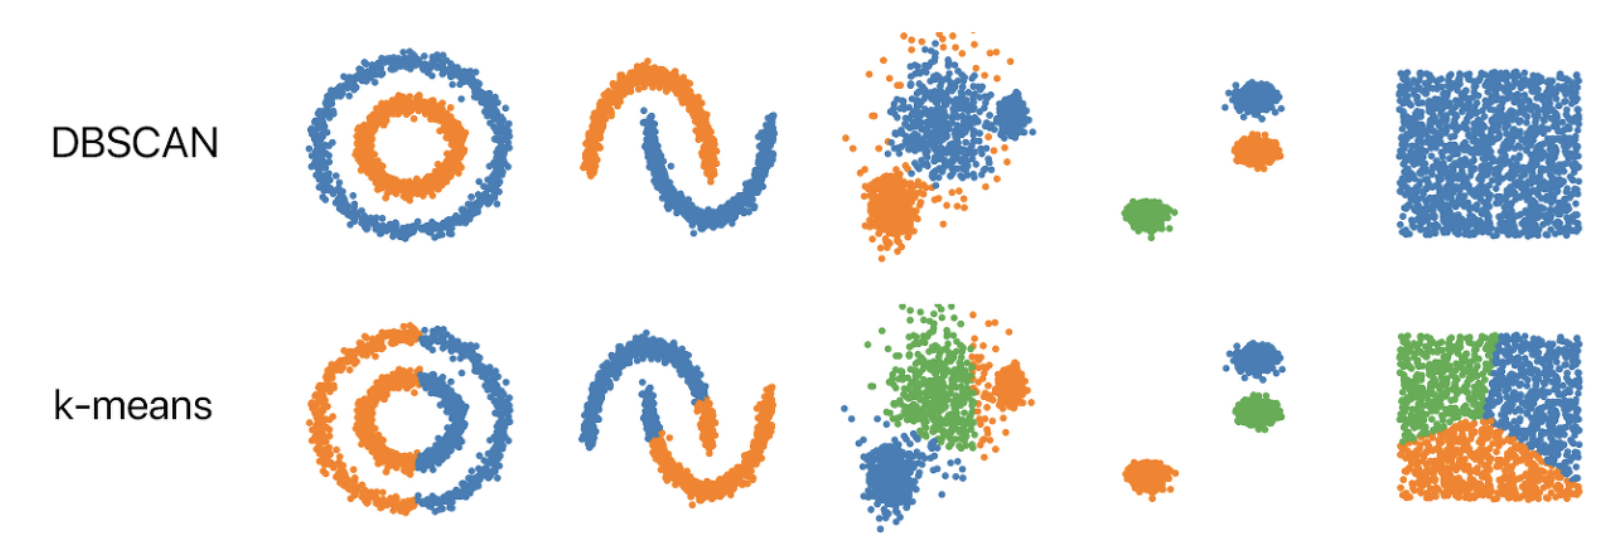
(출처: www.kdnuggets.com)

***
## 3. 차원 축소(1) PCA
**주성분분석(PCA)** <br/>

✔️ Why use?
- 여러 변수들 간에 내재하는 상관관계, 연관성을 이용해 소수의 주성분 or 요인으로 차원을 축소함으로써 데이터를 이해하기 쉽고 관리하기 쉽게 해줌
- 일반적으로 차원이 증가할수록 데이터 간의 거리가 기하급수적으로 증가하기 때문에 희소한 구조를 갖고, 모델의 예측 신뢰도가 떨어진다.
<br/>

- 수많은 정보 속에서 우리에게 더 중요한 요소가 무엇인지를 알게 해줌
- 비지도학습에서는 데이터를 나타내는 여러 특징들 중 어떤 특징이 가장 그 데이터를 잘 표현하는지 알게 해주는 `특징 추출(feature extraction)`의 용도로 사용됨

**주성분** <br/>
- 데이터의 분산이 가장 큰 방향벡터
- 데이터들의 분산을 최대로 보존하며 서로 `직교`(orthogonal)하는 `기저`(bias)들을 찾아 고차원 공간을 저차원 공간으로 사영(projection)함

> - 기저(basis): 어떤 벡터 공간 V의 벡터들이 선형독립이며 벡터 공간 V 전체를 생성할 수 있다면 이 벡터들의 집합이 '기저'이다.

- 기존 feature 중 중요한 것을 선택하는 방식이 아닌 **기존의 feature를 선형 결합**(linear combiination)하는 방식 사용

> 차원 축소를 시도하되, 주어진 좌표축 방향이 아니라 가장 분산이 길게 나오는 기저(basis) 방향을 찾아 그 방향의 기저만 남기고, 덜 중요한 기저 방향을 삭제하는 방식으로 진행됨
> - 여기서 찾은 가장 중요한 기저: 주성분(Principal Component), `pc축`
> - '정보 손실의 최소화'를 위해
> - '사영했을 때 분산이 크다': '원래 데이터의 분포를 잘 설명할 수 있다.'

### 3-1. 데이터 개요

In [16]:
# 차원 축소 예제: 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer = load_breast_cancer()

# y=0(Malignant:악성 종양), y=1(Benign:양성 종양)
cancer_X, cancer_y = cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))

cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- 유방암 데이터를 train, test 셋으로 나눔
- 각각의 train, test 셋에 PCA를 적용해보기.
- PCA를 적용하지 않은 original data와 PCA를 적용한 data를 이용해 SVM classifier를 훈련한 후, PCA의 효과에 대해 비교해보자.

### 2. 유방암 데이터셋에 PCA 알고리즘 적용 예제

> PCA에 넣으려면 데이터프레임 형태여야 하구나..!

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score
from collections import Counter

# color dictionary
color_dict = {0: 'red', 1: 'blue', 2: 'red', 3: 'blue'}
target_dict = {0: 'malignant_train', 1: 'benign_train', 2: 'malignant_test', 3: 'benign_test'}

# Train data에 PCA 알고리즘 적용
train_X_ = StandardScaler().fit_transform(train_X) # 불러온 데이터에 대한 정규화 -> 각 column의 range of value가 전부 다르기 때문에 정규화를 진행해 주어야 합니다.
train_df = pd.DataFrame(train_X_, columns=cancer['feature_names'])

pca = PCA(n_components=2) # 주성분의 수를 2개, 즉 기저가 되는 방향벡터를 2개로 하는 PCA 알고리즘 수행
pc = pca.fit_transform(train_df)

> `StandardScaler().fit_transform`: 각 열마다의 값 범위가 전부 다르므로 동일하게 scaling 하기
> - 개별 feature의 평균이 0, 분산이 1인 값으로 변환 (가우시안 정규 분포)

In [20]:
# Test data에 PCA 알고리즘 적용
test_X_ = StandardScaler().fit_transform(test_X) # normalization
test_df = pd.DataFrame(test_X_, columns=cancer['feature_names'])

pca_test = PCA(n_components=2)
pc_test = pca_test.fit_transform(test_df)

> `서포트 벡터 머신 분류기(SVM classifier)` 훈련 시켜주기
> - 두 카테고리 중 어느 하나에 속한 데이터 집합이 주어졌을 때, SVM 알고리즘은 주어진 데이터 집합을 바탕으로 하여 새로운 데이터가 어느 카테고리에 속할지 판단하는 모델 만듬

> - 주성분을 기반으로 해당 점이 양성인지/악성인지 구분해주는 `결정 경계선`(decision boundary)
> - train data에 맞게 경계선이 그어질 수 있도록 훈련

In [33]:
print(train_df.shape, test_df.shape)

(512, 30) (57, 30)


In [30]:
print(pc.shape, pc_test.shape)

(512, 2) (57, 2)


In [21]:
# 훈련한 classifier의 decision boundary를 그리는 함수
def plot_decision_boundary(X, clf, ax): 
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # 격자 그리드
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # np.c_: 두 배열 가로방향으로 합치기 / np.ravel: 평평하게
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap='Blues')

# PCA를 적용한 train data의 classifier 훈련: classfier로 Support Vector Machine(SVM) 사용
clf = svm.SVC(kernel='rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf.fit(pc, train_y) # train data로 classifier 훈련

# PCA를 적용하지 않은 original data의 SVM 훈련
clf_orig = svm.SVC(kernel='rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf_orig.fit(train_df, train_y)

SVC(C=0.8, gamma=0.5)

**❓ 커널 SVM** <br/>
- 선형 SVM으로는 분류하기 어려운 데이터들을 **높은 차원**으로 이동시켜 고차원 공간에서 데이터 분류하고자 함
- rbf

PCA 분석을 사용한 Test dataset accuracy: 54명/57명 => 0.947
PCA를 적용하지 않은 Test dataset accuracy: 43명/57명 => 0.754


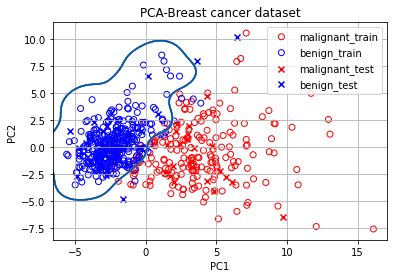

In [37]:
# 캔버스 도식
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# malignant와 benign의 SVM decision boundary 그리기
plot_decision_boundary(pc, clf, ax)
# plot_decision_boundary(train_X_, clf, ax)

# Train data 도식
for cluster in range(2):
    sub_cancer_points = pc[train_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], edgecolor=color_dict[cluster], c='none', label=target_dict[cluster])

# Test data 도식
for cluster in range(2):
    sub_cancer_points = pc_test[test_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], marker= 'x', c=color_dict[cluster+2], label=target_dict[cluster+2])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA-Breast cancer dataset')
ax.legend()
ax.grid()

# Scoring
pca_test_accuracy_dict = Counter(clf.predict(pc_test) == test_y)
orig_test_accuracy_dict = Counter(clf_orig.predict(test_df) == test_y)

print("PCA 분석을 사용한 Test dataset accuracy: {}명/{}명 => {:.3f}".format(pca_test_accuracy_dict[True], sum(pca_test_accuracy_dict.values()), clf.score(pc_test, test_y)))
print("PCA를 적용하지 않은 Test dataset accuracy: {}명/{}명 => {:.3f}".format(orig_test_accuracy_dict[True], sum(orig_test_accuracy_dict.values()), clf_orig.score(test_df, test_y)))

> 단 2개의 주성분 feature만으로 분류한 PCA classifier의 정확도가 30개 feature 모두를 사용한 original classifier보다 훨씬 더 높은 분류 정확도를 보여준다.
> - 30개 중 종양의 악/양성과 관련 없는 것이 존재하기 때문에 해당 feature들이 오히려 분류를 방해했다.

## 20-6. 차원 축소(2) T-SNE

**T-SNE (T-Stochastic Neighbor Embedding)** <br/>
: 시각화에 많이 쓰이는 알고리즘
- 고차원의 데이터를 1~3차원으로 불러들여 데이터를 시각적으로 이해하기 쉽게 함.

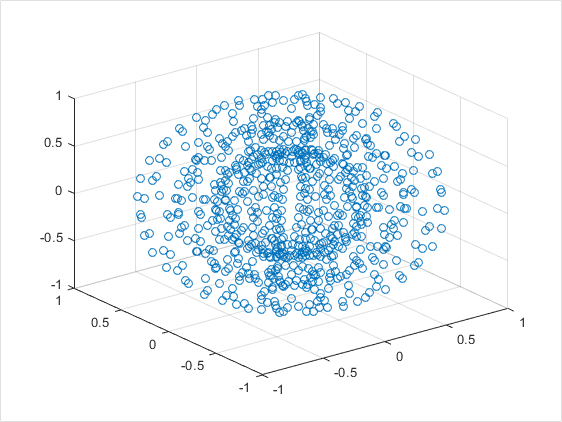

- pca는 선형적인 데이터 분포를 가질 때 정보가 잘 보존되는데, 비선형적 데이터에서는 선형적인 축을 찾기 어렵다.
- 따라서 위 데이터가 PCA를 통해 2차원으로 표현된다면 멀리 있는 데이터가 가까이 있도록 차원 축소가 이루어질 것이다.
- `T-SNE`는 기존 차원 공간에서 가까이 있는 점들은 차원이 축소된 공간에서도 여전히 가깝게 유지되도록 한다.

> - PCA: 데이터가 가진 고유한 물리적 정보량 보존 ❓ (분산 그대로 유지하므로?)
> - T-SNE: 고유한 물리적 정보량보단 데이터들 간의 상대적 거리를 보존 (❓ 좌표축의 물리적 의미 무시)

#### 사이킷런(scikit-learn)에서 MNIST 데이터 불러오기
> ❓ `load_mnist`와의 차이는?!

In [38]:
print("실행 중입니다... 시간이 다소 걸릴 수 있어요. :)\n===")

from sklearn.datasets import fetch_openml

# 784 pixel로 이뤄진 mnist 이미지 데이터 호출
mnist = fetch_openml("mnist_784", version=1)

X = mnist.data / 255.0
y = mnist.target
print("X shape: ", X.shape)
print("Y shape: ", y.shape)

실행 중입니다... 시간이 다소 걸릴 수 있어요. :)
===
X shape:  (70000, 784)
Y shape:  (70000,)


- 70000개의 이미지, 784(28x28)개의 특성

> 판다스 데이터프레임 형태로 만들어주기

In [39]:
n_image = X.shape[0]
n_image_pixel = X.shape[1]

pixel_columns = [f"pixel{i}" for i in range(1, n_image_pixel + 1)] # 픽셀정보가 있는 칼럼의 이름을 담은 목록
len(pixel_columns)

784

In [40]:
import pandas as pd

df = pd.DataFrame(X, columns=pixel_columns)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i)) # 숫자 라벨을 스트링으로 만드는 함수를 파이썬 람다 문법으로 전체 데이터에 적용합니다.

X, y = None, None

> 7만 개의 이미지 데이터 중 1만 개를 랜덤샘플링 함

In [42]:
import numpy as np

# 결과가 재생산 가능하도록 랜덤 시드를 지정합니다.
np.random.seed(30)

# 이미지 데이터의 순서를 랜덤으로 뒤바꾼(permutation) 배열을 담습니다.
rndperm = np.random.permutation(n_image)

# 랜덤으로 섞은 이미지 중 10,000개를 뽑고, df_subset에 담습니다.
n_image_sample = 10000
random_idx = rndperm[:n_image_sample] # 70,000개 중 10,000개
df_subset = df.loc[rndperm[:n_image_sample], :].copy()
df_subset.shape

(10000, 786)

In [44]:
np.random.permutation(10)

array([9, 5, 6, 3, 2, 4, 8, 0, 7, 1])

In [54]:
row[pixel_columns]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 21350, Length: 784, dtype: object

<Figure size 432x288 with 0 Axes>

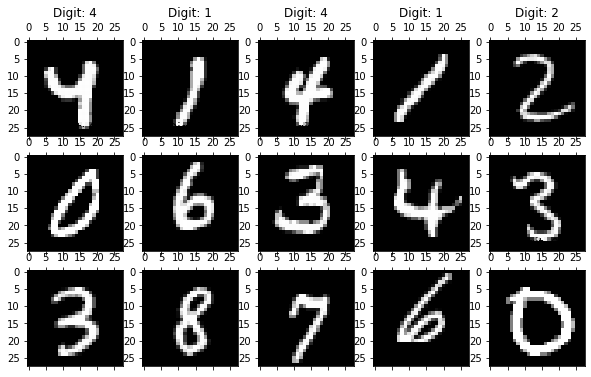

In [51]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.gray()
fig = plt.figure( figsize=(10, 6) )
n_img_sample = 15
width, height = 28, 28

# 15개 샘플을 시각화해 봅니다. 
for i in range(0, n_img_sample):
    row = df_subset.iloc[i]
    ax = fig.add_subplot(3, 5, i+1, title=f"Digit: {row['label']}")
    ax.matshow(row[pixel_columns]
               .values.reshape((width, height))
               .astype(float))

plt.show()

### PCA를 이용한 MNIST 차원 축소

In [55]:
from sklearn.decomposition import PCA

print("df_subset의 shape: {}".format(df_subset.shape))

n_dimension = 2 # 축소시킬 목표 차원의 수
pca = PCA(n_components=n_dimension)

pca_result = pca.fit_transform(df_subset[pixel_columns].values) # 차원을 축소한 결과
df_subset['pca-one'] = pca_result[:, 0] # 축소한 결과의 첫 번째 차원 값
df_subset['pca-two'] = pca_result[:, 1] # 축소한 결과의 두 번째 차원 값

print("pca_result의 shape: {}".format(pca_result.shape))

df_subset의 shape: (10000, 786)
pca_result의 shape: (10000, 2)


In [56]:
pca.explained_variance_ratio_

array([0.09566365, 0.07317767])

> `pca.explained_varaiance_ratio_` 해석: 원 데이터셋 분산의 9.55%가 첫 번째 주성분 축에, 7.31%가 두 번째 주성분 축에 놓여 있음
> - pc축마다 보존하는 정보량의 비율 제시해줌

In [57]:
print(f"pca-1: {round(pca.explained_variance_ratio_[0], 3)*100}%")
print(f"pca-2: {round(pca.explained_variance_ratio_[1], 3)*100}%")

pca-1: 9.6%
pca-2: 7.3%


> `784차원`을 2차원으로 축소하였을 때, 정보량이 전체의 16.9%가 남음
> 이 결과 벡터를 `Scatter 그래프`로 그려보는데, 같거나 모양이 비슷한 숫자 이미지가 `유사한 벡터값`을 갖는 것을 **색상**으로 확인할 수 있음

<AxesSubplot:xlabel='pca-one', ylabel='pca-two'>

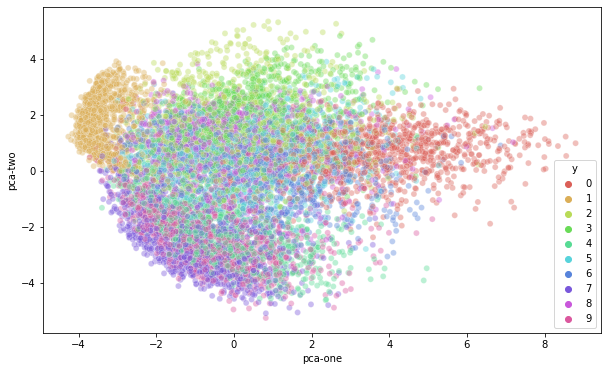

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,   # 2개의 PC축만 남은 데이터프레임 df_subset을 시각화해 보자.
    legend="full",
    alpha=0.4
)

- PCA로 784차원을 2차원으로 줄여 scatter그래프로 그렸다.
- 같거나 모양이 비슷한 숫자 이미지가 유사한 벡터 값을 갖는 것을 색상으로 알 수 있다.

### T-SNE를 이용한 MNIST 차원 축소
: 고차원 공간에서 유사한 두 벡터가 2차원 공간에서도 유사하도록 원 공간에서의 점들간 유사도를 보존하며 차원을 축소하는 방법

> 동일한 1만 개의 이미지 데이터의 차원 축소해보기

In [59]:
# pca보다 시간이 좀 더 걸림
from sklearn.manifold import TSNE

print("df_subset의 shape: {}".format(df_subset.shape))

data_subset = df_subset[pixel_columns].values
n_dimension = 2
tsne = TSNE(n_components=n_dimension)
tsne_results = tsne.fit_transform(data_subset)

print("tsne_results의 shape: {}".format(tsne_results.shape))

df_subset의 shape: (10000, 788)


/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


tsne_results의 shape: (10000, 2)


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

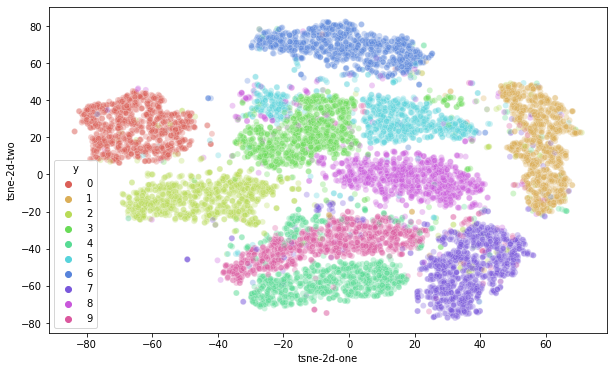

In [60]:
# tsne 결과를 차원별로 추가합니다.
df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]

# 시각화해 봅니다.
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

> `T-SNE`는 기존 차원의 공간에서 가까운 점들은 차원 축소된 공간에서도 여전히 가깝게 유지됨 <br/>
-> MNIST의 784차원의 숫자 이미지를 2차원으로 시각화하여도, 같은 숫자의 이미지끼리 유사한 거리에 놓이는 것을 확인함

차원 축소를 통해 발생하는 정보 손실: '두 점 사이의 거리'
- PCA의 pc축을 따라 발생한 거리라면 유지가 되지만, 그렇지 않을 경우 PCA 과정을 통해 두 점 사이의 거리가 소거되고, 실제로는 먼 거리의 점들이 아주 가까운 점으로 투영될 가능성이 있다.
- T-SNE는 고차원에서 먼 거리는 저차원에서도 먼 거리로, 

> PCA: 정보 손실을 최소화하려고 하지만, T-SNE: 정보 손실량에 주목하지 않음. <br/>
-> T-SNE: 좌표 축의 물리적 의미를 무시하므로 `시각화`에만 유리!!